# **Classification of 90 Different Faces of Animals**

## Reading the data from the dataset

In [1]:
#Importing libraries
import cv2
import glob
import os
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import tensorflow as tf

2024-03-01 18:13:10.610748: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 18:13:10.610905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 18:13:10.761045: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#List of animal names
f = open("/kaggle/input/animal-image-dataset-90-different-animals/name of the animals.txt","r")
names_list = f.read().split("/n")[0].split("\n")
print("List of animals:")
for name in names_list:
    print(name)

List of animals:
antelope
badger
bat
bear
bee
beetle
bison
boar
butterfly
cat
caterpillar
chimpanzee
cockroach
cow
coyote
crab
crow
deer
dog
dolphin
donkey
dragonfly
duck
eagle
elephant
flamingo
fly
fox
goat
goldfish
goose
gorilla
grasshopper
hamster
hare
hedgehog
hippopotamus
hornbill
horse
hummingbird
hyena
jellyfish
kangaroo
koala
ladybugs
leopard
lion
lizard
lobster
mosquito
moth
mouse
octopus
okapi
orangutan
otter
owl
ox
oyster
panda
parrot
pelecaniformes
penguin
pig
pigeon
porcupine
possum
raccoon
rat
reindeer
rhinoceros
sandpiper
seahorse
seal
shark
sheep
snake
sparrow
squid
squirrel
starfish
swan
tiger
turkey
turtle
whale
wolf
wombat
woodpecker
zebra


In [3]:
for dirname, _, filenames in os.walk('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/687486f1cb.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/parrot/5affc48d37.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/fox/4f98c92165.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/wolf/9cdcad3179.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/hedgehog/3a20b11532.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/turtle/27640f375d.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/snake/38dcca56f9.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/shark/2d099bdddf.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/horse/8c9f6aadda.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/antelope/72e3e735f7.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/

## Checking Image Data

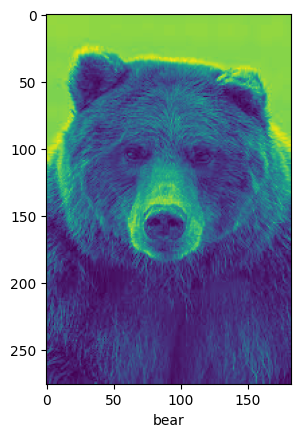

In [4]:
filepath = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/bear"

for img_path in os.listdir(filepath):
    img = cv2.imread(os.path.join(filepath, img_path), 0)
    plt.imshow(img)
    plt.xlabel(filepath.split("/")[-1])
    plt.show()   
    break

## Spliting Dataset into Train & Test

In [5]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    vertical_flip = True,
    validation_split = 0.2
)


train_df = train_datagen.flow_from_directory(
    "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals",
    target_size = (256, 256) ,
    color_mode = "grayscale"
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    vertical_flip = True,
    validation_split = 0.2
)

validation_generator = test_datagen.flow_from_directory(
        "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals",
        target_size = (256, 256) ,
        color_mode = "grayscale"
)

Found 5400 images belonging to 90 classes.
Found 5400 images belonging to 90 classes.


In [6]:
# model.fit(
#         train_generator,
#         steps_per_epoch=2000,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=800
# )